1. Подготовка среды

In [ ]:
# Импорт основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотеки для машинного обучения
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Модели
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Для глубокой нейронной сети
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Игнорируем предупреждения
import warnings
warnings.filterwarnings('ignore')


2. Загрузка и ознакомление с данными

In [ ]:
# Загрузка данных
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Первые несколько строк обучающего набора
print("Обучающий набор:")
display(train.head())

print("\nТестовый набор:")
display(test.head())

Обучающий набор:


,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0



Тестовый набор:


,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,600000,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,600001,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,600002,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,600003,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
4,600004,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3


In [ ]:
# Информация о данных
print("\nИнформация об обучающем наборе:")
train.info()


Информация об обучающем наборе:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                            

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    400000 non-null  int64  
 1   age                                   400000 non-null  float64
 2   sex                                   400000 non-null  int64  
 3   chest                                 400000 non-null  float64
 4   resting_blood_pressure                400000 non-null  float64
 5   serum_cholestoral                     400000 non-null  float64
 6   fasting_blood_sugar                   400000 non-null  int64  
 7   resting_electrocardiographic_results  400000 non-null  int64  
 8   maximum_heart_rate_achieved           400000 non-null  float64
 9   exercise_induced_angina               400000 non-null  int64  
 10  oldpeak                               400000 non-null  float64
 11  

In [ ]:
print("\nСтатистическое описание:")
train.describe()



Статистическое описание:


,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,299999.500000,54.426085,0.677447,3.170247,131.340485,249.592420,0.150757,1.020148,149.592069,0.333502,1.051391,1.596033,0.681303,4.711378,0.444185
std,173205.225094,9.086041,0.467454,0.949618,17.842450,51.699976,0.357812,0.994204,23.072593,0.471464,1.144288,0.629821,0.950669,1.934766,0.496875
min,0.000000,26.061695,0.000000,-0.538498,82.918527,98.326263,0.000000,0.000000,61.844168,0.000000,-0.806788,1.000000,0.000000,3.000000,0.000000
25%,149999.750000,48.078493,0.000000,3.000000,119.924094,216.475964,0.000000,0.000000,135.704237,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,299999.500000,55.133425,1.000000,3.000000,129.727941,244.233699,0.000000,2.000000,153.224828,0.000000,0.811101,2.000000,0.000000,3.000000,0.000000
75%,449999.250000,60.663775,1.000000,4.000000,139.915216,274.345453,0.000000,2.000000,165.165497,1.000000,1.674081,2.000000,1.000000,7.000000,1.000000
max,599999.000000,79.591647,1.000000,4.000000,209.673650,527.755764,1.000000,2.000000,208.735196,1.000000,6.803372,3.000000,3.000000,7.000000,1.000000


In [ ]:

# Проверка пропущенных значений в обучающем наборе
print("Пропущенные значения в обучающем наборе данных:")
print(train.isnull().sum())


Пропущенные значения в обучающем наборе данных:
ID                                      0
age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64


3. Предобработка данных

3.1 Обработка пропущенных значений

In [ ]:
# Определяем числовые признаки, которые требуют заполнения
numerical_features = ['age', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak', 'number_of_major_vessels']

# Заполнение пропущенных значений медианой для числовых признаков
for feature in numerical_features:
    if train[feature].isnull().sum() > 0:
        median = train[feature].median()
        train[feature].fillna(median, inplace=True)
        print(f"Заполнены пропущенные значения в '{feature}' медианой: {median}")


3.2 Преобразование категориальных переменных

In [ ]:
# Определение категориальных признаков
categorical_features = ['sex']  # Добавьте другие категориальные признаки, если они есть

# Преобразование переменной 'sex' с использованием One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_sex = encoder.fit_transform(train[categorical_features])

# Создание DataFrame из закодированной переменной 'sex'
encoded_sex_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(categorical_features))

# Сброс индексов для корректного объединения
encoded_sex_df.reset_index(drop=True, inplace=True)

# Объединение закодированной переменной с исходными данными
train = pd.concat([train.reset_index(drop=True), encoded_sex_df], axis=1)

# Удаляем исходные категориальные переменные
train.drop(categorical_features, axis=1, inplace=True)

print(f"\nФорма данных после One-Hot Encoding для 'sex': {train.shape}")
display(train.head())



Форма данных после One-Hot Encoding для 'sex': (600000, 15)


,ID,age,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class,sex_1
0,0,49.207124,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1,0.0
1,1,53.628425,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0,1.0
2,2,49.591426,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1,1.0
3,3,58.991445,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1,1.0
4,4,51.053602,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0,1.0


3.3 Масштабирование числовых признаков

In [ ]:
# Инициализация масштабатора
scaler = StandardScaler()

# Масштабирование числовых признаков
train[numerical_features] = scaler.fit_transform(train[numerical_features])

print("\nФорма данных после масштабирования числовых признаков:")
display(train.head())



Форма данных после масштабирования числовых признаков:


,ID,age,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class,sex_1
0,0,-0.574394,4.000000,1.774179,-1.324639,0,0,-0.059127,1,-0.093372,2,-0.716658,3,1,0.0
1,1,-0.087790,1.741596,-0.062029,0.519966,0,2,0.144114,0,-0.814761,2,-0.716658,3,0,1.0
2,2,-0.532098,4.000000,0.877600,-0.508548,1,2,-2.047452,1,0.494068,2,1.387127,7,1,1.0
3,3,0.502459,4.000000,-1.063271,-1.205938,0,0,0.371553,1,-0.918817,1,0.335235,7,1,1.0
4,4,-0.371172,1.954609,0.375036,-0.214885,0,0,0.994634,0,0.086581,1,0.335235,3,0,1.0


4. Анализ данных

4.1 Корреляционный анализ

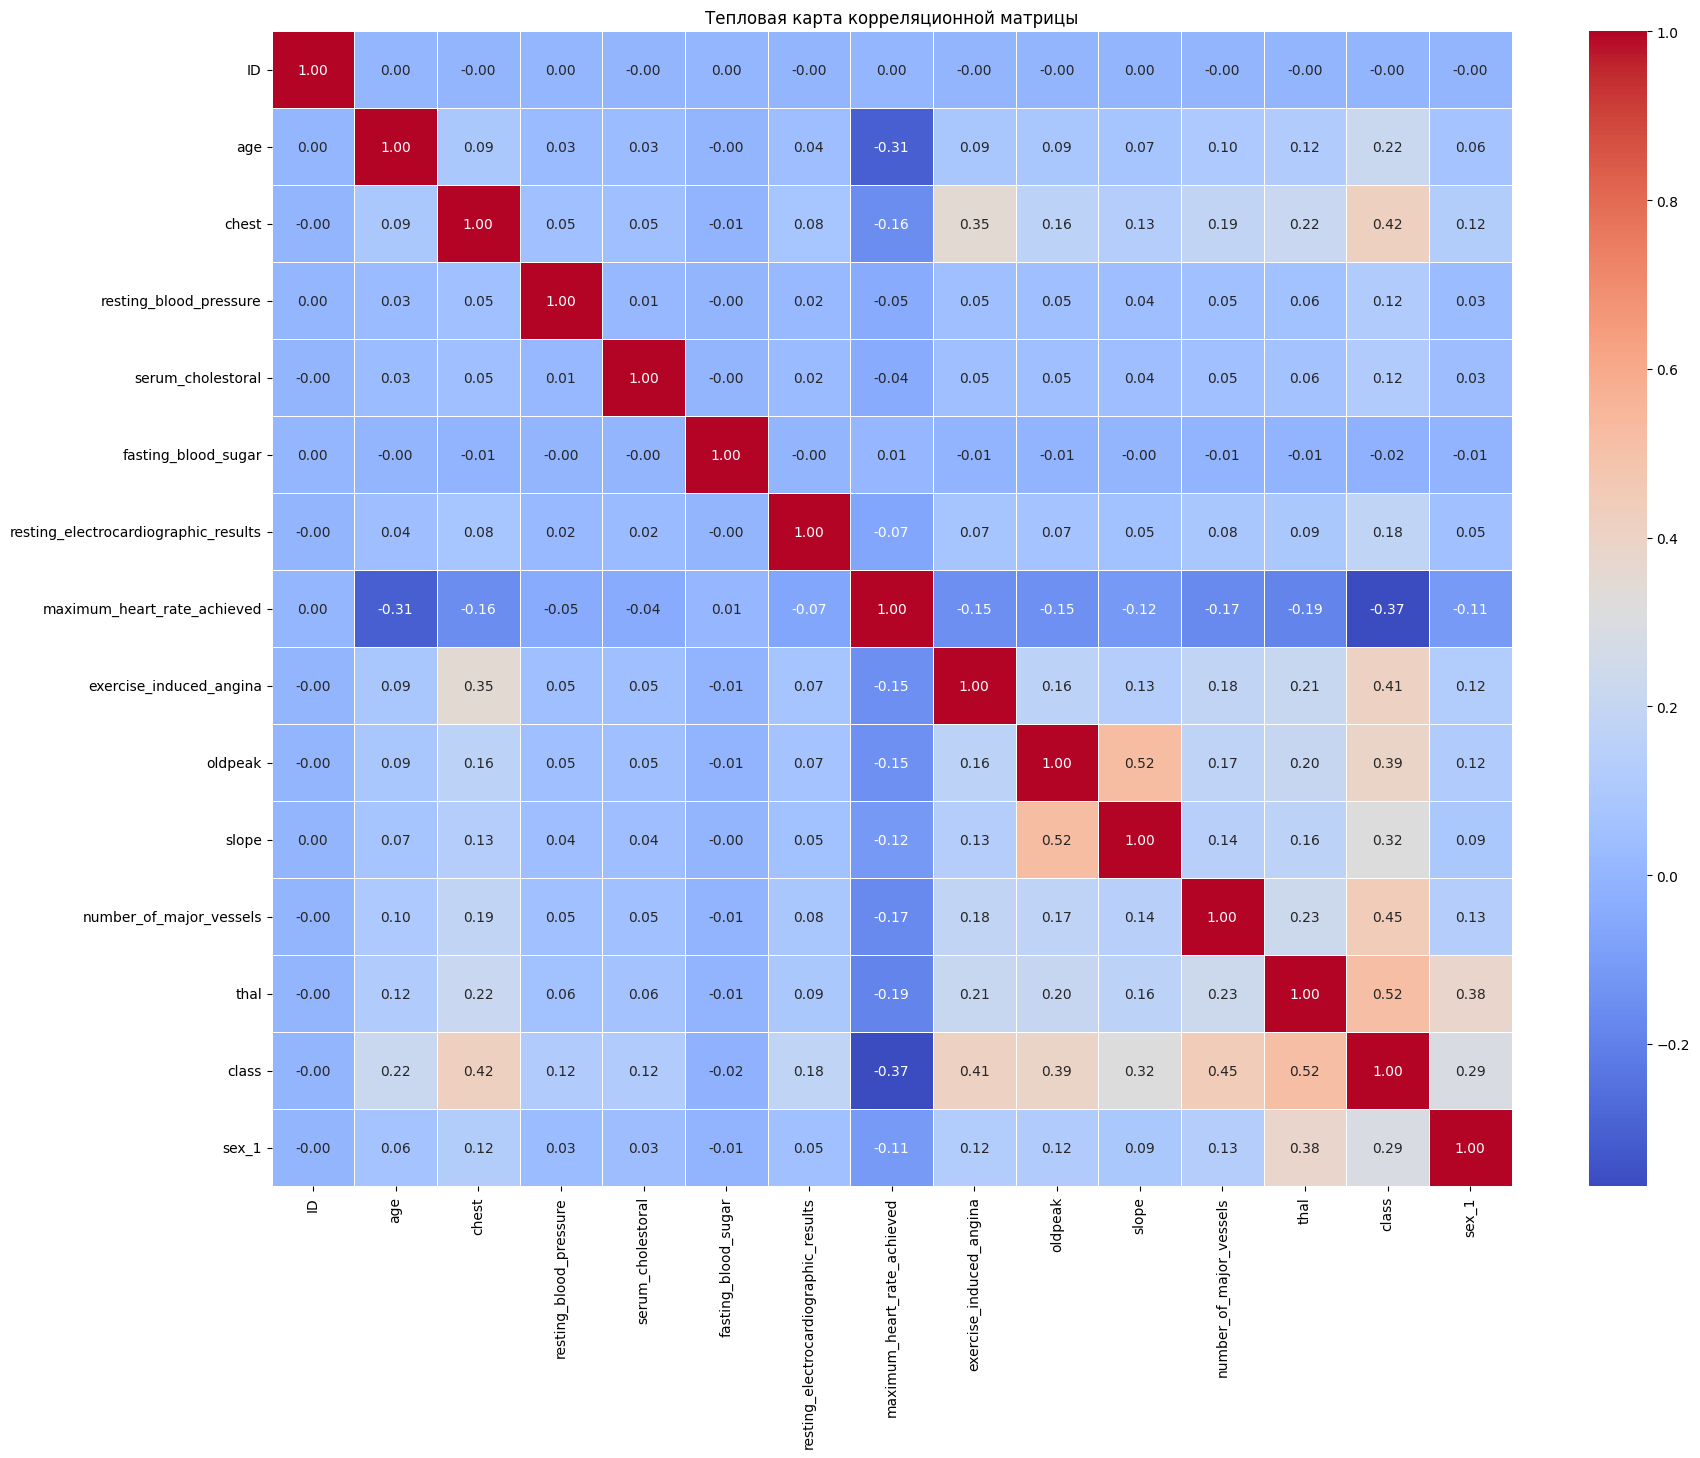

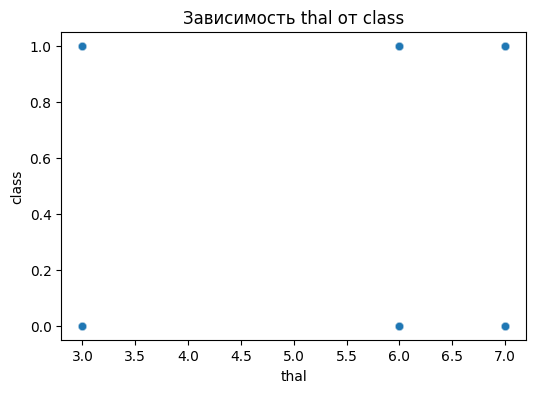

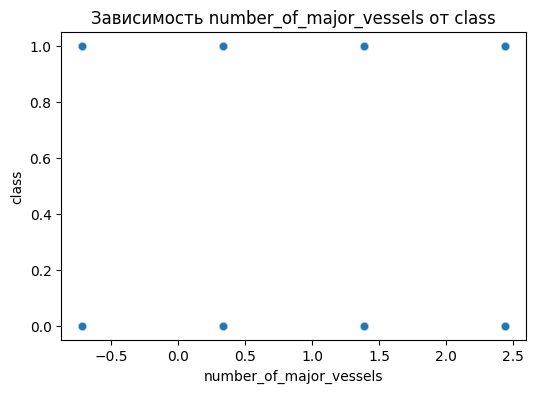

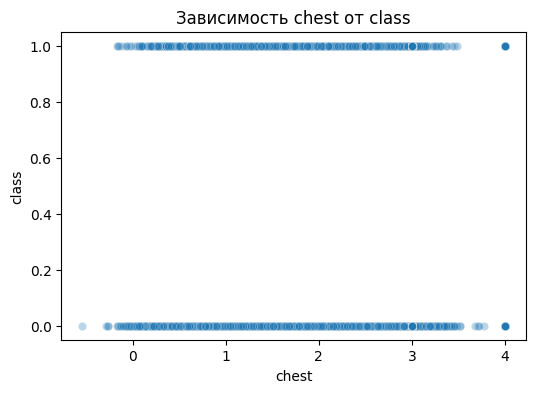

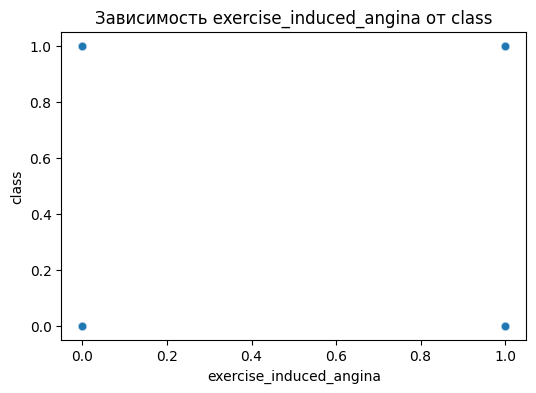

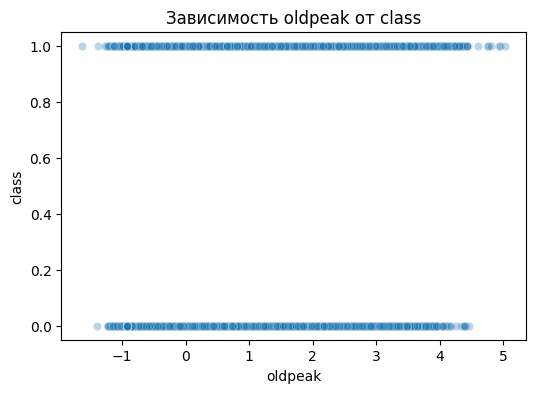

In [ ]:
# Корреляционная матрица
corr_matrix = train.corr()

# Тепловая карта корреляционной матрицы
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта корреляционной матрицы')
plt.show()

# Выбор топ 5 признаков по корреляции с целевой переменной 'class'
top_corr_features = corr_matrix['class'].abs().sort_values(ascending=False).index[1:6]

# Диаграммы рассеяния для наиболее коррелированных признаков
for feature in top_corr_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train[feature], y=train['class'], alpha=0.3)
    plt.title(f'Зависимость {feature} от class')
    plt.xlabel(feature)
    plt.ylabel('class')
    plt.show()


4.2 Оценка выбросов

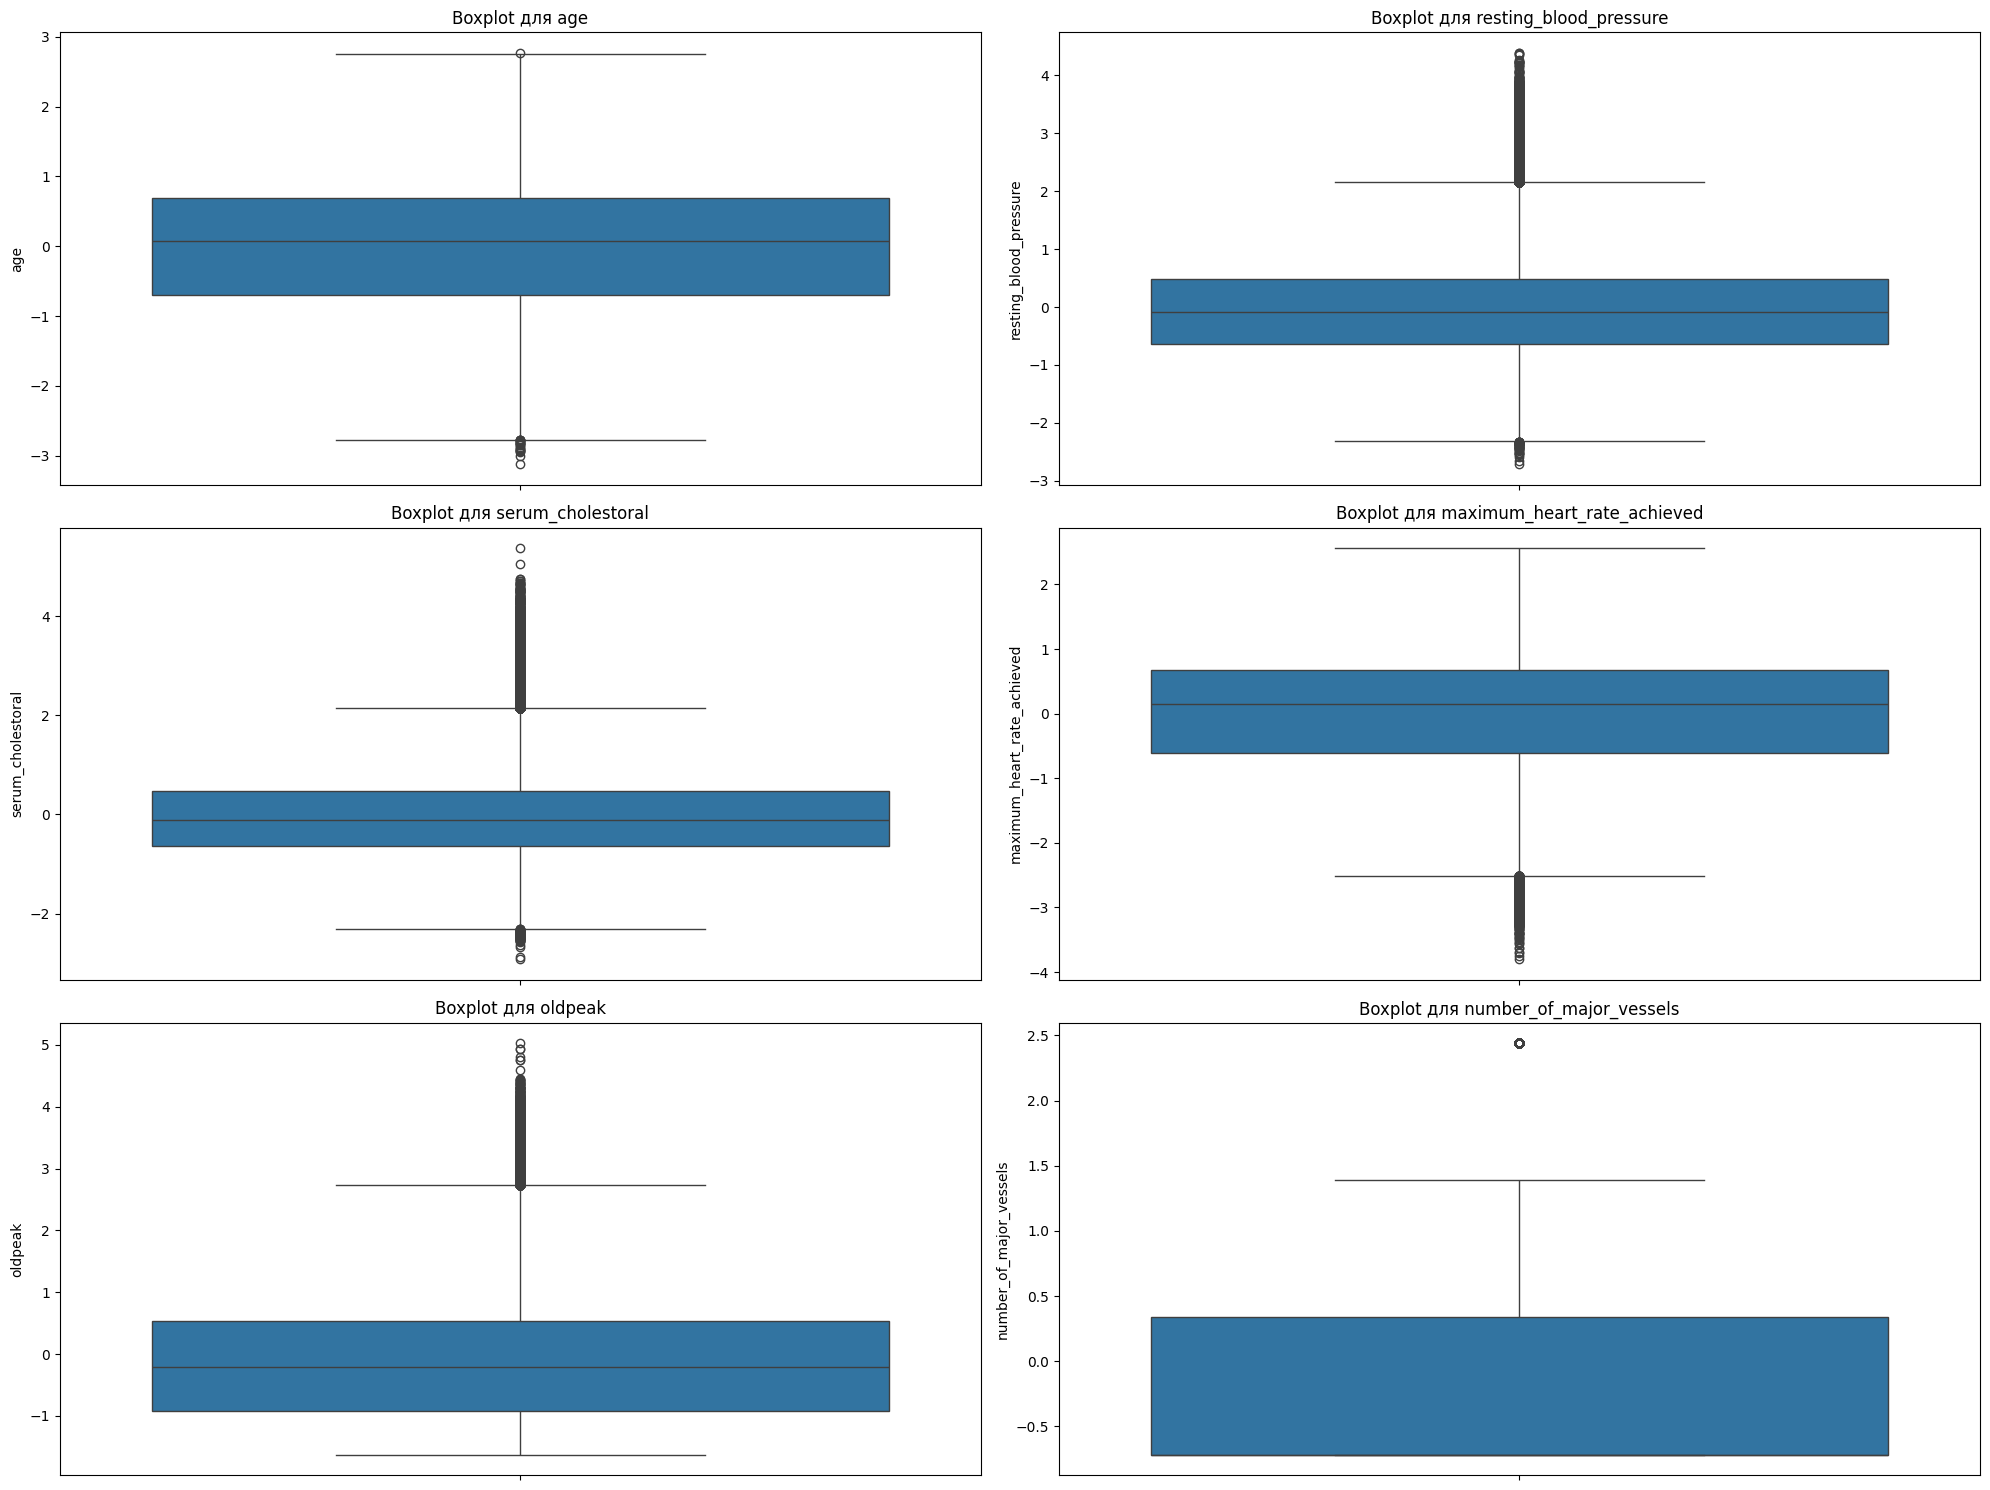

In [ ]:
# Ящики с усами (boxplot) для числовых признаков
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=train[feature])
    plt.title(f'Boxplot для {feature}')
plt.tight_layout()
plt.show()



Scatterplots (диаграммы рассеяния)

oldpeak: Значения в диапазоне от -1 до 5, нет выраженных выбросов, данные распределены относительно равномерно между классами.

exercise_induced_angina: Бинарный признак (0 или 1), распределение без аномалий.

chest: Категориальный признак (0-4), выбросы отсутствуют, данные релевантны.

number_of_major_vessels: Есть выбросы (значения около -0.5), нужно корректировать.

thal: Категориальный признак (3-7), выбросы отсутствуют, данные релевантны.

Boxplots (ящики с усами)

age: Незначительные выбросы внизу, можно оставить.

serum_cholestoral: Много выбросов на верхнем конце, но они релевантны.

resting_blood_pressure: Несколько выбросов на высоком уровне, стоит учитывать их.

maximum_heart_rate_achieved: Есть выбросы, которые могут быть важными.

oldpeak: Выбросы на высоком уровне, возможно релевантны.

number_of_major_vessels: Есть некорректные значения, их нужно удалить.

Выбор стратегии работы с выбросами:

Не трогать выбросы, так как они могут отражать важные особенности данных и являться клинически значимыми (например, высокое давление или уровень холестерина). Исключение выбросов может привести к потере информации, важной для построения качественной модели.

5. Разделение данных на обучающую и тестовую выборки

In [ ]:
# Целевая переменная
X = train.drop('class', axis=1)
y = train['class'].astype(int)

# Разделение на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Размеры выборок: \nX_train: {X_train.shape}, X_val: {X_val.shape}, y_train: {y_train.shape}, y_val: {y_val.shape}")


Размеры выборок: 
X_train: (480000, 14), X_val: (120000, 14), y_train: (480000,), y_val: (120000,)


6. Обучение моделей

6.1 Логистическая регрессия

In [ ]:
# Логистическая регрессия
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
y_proba_lr = lr.predict_proba(X_val)[:, 1]

# Оценка модели
print("Логистическая регрессия:")
print(classification_report(y_val, y_pred_lr))
print(f"AUC: {roc_auc_score(y_val, y_proba_lr):.4f}")


Логистическая регрессия:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     66698
           1       0.87      0.85      0.86     53302

    accuracy                           0.88    120000
   macro avg       0.88      0.87      0.88    120000
weighted avg       0.88      0.88      0.88    120000

AUC: 0.9478


6.2 Случайный лес

In [ ]:
# Случайный лес
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
y_proba_rf = rf.predict_proba(X_val)[:,1]

# Оценка модели
print("Случайный лес:")
print(classification_report(y_val, y_pred_rf))
print(f"AUC: {roc_auc_score(y_val, y_proba_rf):.4f}")


Случайный лес:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     66698
           1       0.89      0.88      0.88     53302

    accuracy                           0.90    120000
   macro avg       0.90      0.90      0.90    120000
weighted avg       0.90      0.90      0.90    120000

AUC: 0.9602


6.3 XGBoost

In [ ]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)
y_proba_xgb = xgb.predict_proba(X_val)[:,1]

# Оценка модели
print("XGBoost:")
print(classification_report(y_val, y_pred_xgb))
print(f"AUC: {roc_auc_score(y_val, y_proba_xgb):.4f}")


XGBoost:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     66698
           1       0.90      0.88      0.89     53302

    accuracy                           0.90    120000
   macro avg       0.90      0.90      0.90    120000
weighted avg       0.90      0.90      0.90    120000

AUC: 0.9648


6.4 Глубокая нейронная сеть

Обучим модель глубокой нейронной сети и оценим её качество. Также построим графики обучения.

In [ ]:
# Стандартизация данных для нейронной сети
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Построение модели
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC()]
)

# Обучение модели с ранней остановкой
early_stop = EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=1024,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stop],
    verbose=1
)

# Оценка модели
y_proba_nn = model.predict(X_val_scaled).ravel()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

print("Глубокая нейронная сеть:")
print(classification_report(y_val, y_pred_nn))
print(f"AUC: {roc_auc_score(y_val, y_proba_nn):.4f}")


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - auc: 0.9245 - loss: 0.3420 - val_auc: 0.9572 - val_loss: 0.2637
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.9550 - loss: 0.2687 - val_auc: 0.9587 - val_loss: 0.2600
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.9565 - loss: 0.2646 - val_auc: 0.9593 - val_loss: 0.2588
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9578 - loss: 0.2606 - val_auc: 0.9596 - val_loss: 0.2562
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9581 - loss: 0.2592 - val_auc: 0.9599 - val_loss: 0.2563
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - auc: 0.9585 - loss: 0.2583 - val_auc: 0.9604 - val_loss: 0.2550
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - auc: 0.9589 - loss: 0.2568 - val_auc: 0.9607 - val_loss: 0.2538
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9589 - loss: 0.2569 - val_auc: 0.9610 - val_loss: 0.2535
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - 

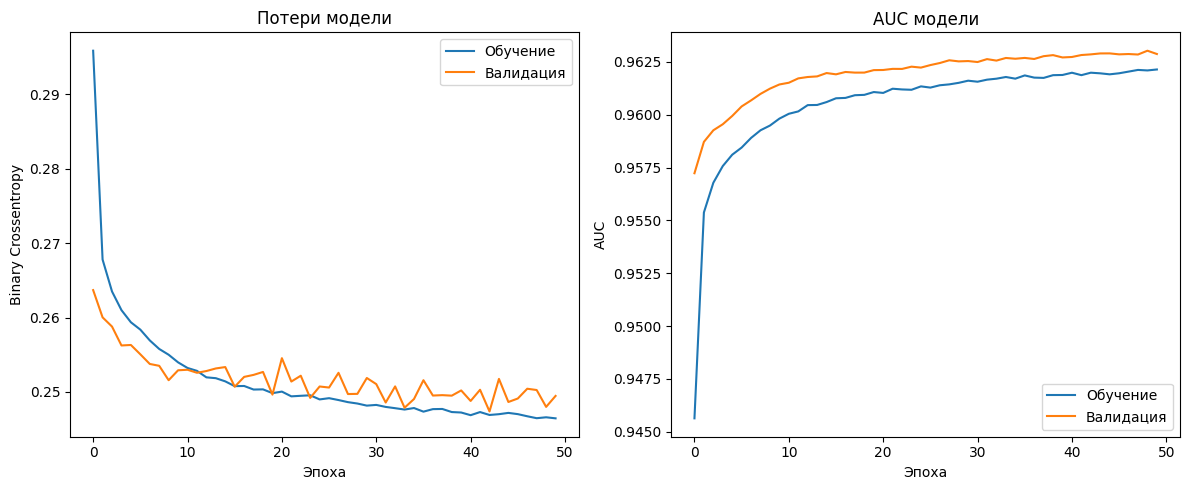

In [ ]:
# Графики обучения
plt.figure(figsize=(12, 5))

# Потери
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Binary Crossentropy')
plt.legend()

# AUC
plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Обучение')
plt.plot(history.history['val_auc'], label='Валидация')
plt.title('AUC модели')
plt.xlabel('Эпоха')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()


7. Сравнение моделей

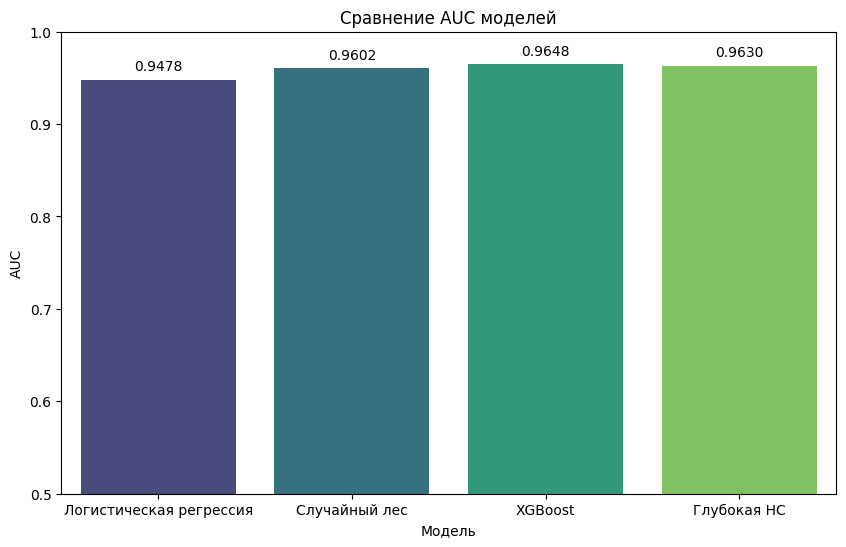

In [ ]:
# Сравнение AUC разных моделей
auc_lr = roc_auc_score(y_val, y_proba_lr)
auc_rf = roc_auc_score(y_val, y_proba_rf)
auc_xgb = roc_auc_score(y_val, y_proba_xgb)
auc_nn = roc_auc_score(y_val, y_proba_nn)

# Визуализация
models = ['Логистическая регрессия', 'Случайный лес', 'XGBoost', 'Глубокая НС']
auc_scores = [auc_lr, auc_rf, auc_xgb, auc_nn]

plt.figure(figsize=(10,6))
sns.barplot(x=models, y=auc_scores, palette='viridis')
plt.ylim(0.5, 1)
plt.title('Сравнение AUC моделей')
plt.ylabel('AUC')
plt.xlabel('Модель')
for index, value in enumerate(auc_scores):
    plt.text(index, value + 0.01, f"{value:.4f}", ha='center')
plt.show()


In [ ]:
import joblib

# Сохранение модели XGBoost
joblib.dump(xgb, 'xgboost_model.joblib')

# Сохранение масштабатора и энкодера
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(encoder, 'encoder.joblib')

print("Модель XGBoost и объекты предобработки сохранены ")


Модель XGBoost и объекты предобработки сохранены 


8. Инференс: Предсказание на тестовом наборе

Скрипт для инференса, который можно использовать отдельно.

In [ ]:
import joblib
import pandas as pd

# Загрузка модели XGBoost и масштабатора
best_model = joblib.load('xgboost_model.joblib')
best_scaler = joblib.load('scaler.joblib')

# Загрузка тестового набора данных
test = pd.read_csv('test.csv')

# Проверка наличия необходимых столбцов
if 'ID' not in test.columns:
    raise ValueError("В тестовом наборе отсутствует столбец 'ID'.")

# Сохранение ID из тестового набора
test_ids = test['ID']

# Удаление столбца 'ID' из данных перед предобработкой
test_processed = test.drop(['ID'], axis=1)

# Преобразование категориальных признаков (например, 'sex')
categorical_features = ['sex']  # Добавьте другие категориальные признаки, если они есть
encoded_sex = encoder.transform(test_processed[categorical_features])

# Создание DataFrame из закодированной переменной 'sex'
encoded_sex_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(categorical_features))

# Сброс индексов для корректного объединения
encoded_sex_df.reset_index(drop=True, inplace=True)

# Объединение закодированной переменной с исходными данными
test_processed = pd.concat([test_processed.reset_index(drop=True), encoded_sex_df], axis=1)

# Удаление исходных категориальных переменных
test_processed.drop(categorical_features, axis=1, inplace=True)

# Приведение тестовых данных к той же структуре, что и обучающие данные
# Определение признаков, которые использовались при обучении масштабатора
expected_features = best_scaler.feature_names_in_

# Сортировка признаков в тестовом наборе данных в том же порядке, как и в обучающих данных
test_processed = test_processed.reindex(columns=expected_features, fill_value=0)

# Масштабирование числовых признаков
test_processed_scaled = best_scaler.transform(test_processed)

# Предсказания на тестовом наборе
test_predictions_proba = best_model.predict_proba(test_processed_scaled)[:, 1]
test_predictions = best_model.predict(test_processed_scaled)

# Создание DataFrame для сохранения результатов
submission = pd.DataFrame({
    'ID': test_ids,
    'class': test_predictions
})

# Сохранение результатов
submission.to_csv('submission.csv', index=False)
print("Инференс завершён. Результаты сохранены в 'submission.csv'.")


Инференс завершён. Результаты сохранены в 'submission.csv'.


Отдельный скрипт

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier

def load_data(test_path):
    """
    Загрузка тестовых данных.
    """
    test = pd.read_csv(test_path)
    return test

def preprocess_data(data, scaler, encoder, expected_features):
    """
    Предобработка данных:
    - Заполнение пропущенных значений медианой для числовых признаков
    - One-Hot Encoding для категориальных признаков
    - Масштабирование числовых признаков
    - Приведение признаков в соответствии с обучающими данными
    """
    # Сохранение 'ID' для финального файла
    test_ids = data['ID']

    # Удаление 'ID' из данных перед предобработкой
    data = data.drop(['ID'], axis=1)

    # Определение числовых и категориальных признаков
    numerical_features = ['age', 'resting_blood_pressure', 'serum_cholestoral',
                          'maximum_heart_rate_achieved', 'oldpeak', 'number_of_major_vessels']
    categorical_features = ['sex']

    # Заполнение пропущенных значений медианой для числовых признаков
    for feature in numerical_features:
        if data[feature].isnull().sum() > 0:
            median = data[feature].median()
            data[feature].fillna(median, inplace=True)

    # One-Hot Encoding для категориальных признаков
    encoded_categorical = encoder.transform(data[categorical_features])
    encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

    # Объединение закодированных категориальных признаков с исходными данными
    data = pd.concat([data.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

    # Удаление исходных категориальных признаков
    data.drop(categorical_features, axis=1, inplace=True)

    # Масштабирование числовых признаков
    data[numerical_features] = scaler.transform(data[numerical_features])

    # Приведение тестовых данных к той же структуре, что и обучающие данные
    # Убедимся, что тестовые данные содержат только те признаки, которые были использованы при обучении
    data = data.reindex(columns=expected_features, fill_value=0)

    return data, test_ids

def predict(model, data):
    """
    Выполнение предсказаний с использованием модели XGBoost.
    """
    predictions = model.predict(data)
    probabilities = model.predict_proba(data)[:,1]
    return predictions, probabilities

def main():
    # Пути к файлам
    test_path = 'test.csv'  # Убедитесь, что путь корректен
    output_path = 'inference_submission.csv'

    # Загрузка тестовых данных
    test = load_data(test_path)

    # Проверка наличия столбца 'ID'
    if 'ID' not in test.columns:
        raise ValueError("В тестовых данных отсутствует столбец 'ID'.")

    # Загрузка масштабатора и энкодера
    scaler = joblib.load('scaler.joblib')
    encoder = joblib.load('encoder.joblib')

    # Определение признаков, которые использовались при обучении
    expected_features = scaler.feature_names_in_

    # Предобработка данных
    test_processed, test_ids = preprocess_data(test, scaler, encoder, expected_features)

    # Загрузка модели XGBoost
    model = joblib.load('xgboost_model.joblib')

    # Выполнение предсказаний
    predictions, probabilities = predict(model, test_processed)

    # Создание DataFrame для сохранения результатов
    submission = pd.DataFrame({
        'ID': test_ids,
        'class': predictions
    })

    # Сохранение результатов
    submission.to_csv(output_path, index=False)
    print(f"Инференс завершён. Результаты сохранены в '{output_path}'.")

if __name__ == "__main__":
    main()
